<a href="https://colab.research.google.com/github/hvr2026/Advanced-Dimensionality-Reduction/blob/main/ADR%20on%20Tabular%20Data%20Set/Using_Tabular_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly umap-learn datashader lottie tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00
  Created wheel for lottie: filename=lottie-0.7.1-py3-none-any.whl size=194864 sha256=721ec83158f67f054cb71478df29f543dac2a6aed8473dd06e789b0330dc4869
  Stored in directory: /root/.cache/pip/wheels/b2/80/e9/c6d8a95c6308e98d72f876e3e5e6dca882ea0581c744051e47
Successfully built lottie


In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import umap
import umap.plot
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap, MDS
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
import tensorflow as tf

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/usr/local/lib/python3.10/dist-pa

In [24]:
import seaborn as sns


In [4]:
# Load dataset
file_path = '/content/Student Depression Dataset.csv'
data = pd.read_csv(file_path)

In [5]:
# Select numerical columns for dimensionality reduction
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                  'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                  'Financial Stress', 'Depression']


In [6]:
data_numerical = data[numerical_cols]

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

In [7]:
# Split the dataset for train/test
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=0)

In [8]:
# Function for plotting 2D projections
def plot_projection(X, y=None, title="", method=""):
    fig = px.scatter(x=X[:, 0], y=X[:, 1], color=y, title=f"{method} Projection - {title}")
    fig.update_layout(xaxis_title="Component 1", yaxis_title="Component 2")
    fig.show()


In [31]:
# 1. Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2, random_state=0)
X_lle = lle.fit_transform(X_train)
plot_projection(X_lle, title="Locally Linear Embedding (LLE)", method="LLE")

In [27]:
# 2. t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_train)
plot_projection(X_tsne, title="t-SNE", method="t-SNE")

In [30]:
# 3. Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_train)
plot_projection(X_isomap, title="Isomap", method="Isomap")

In [33]:
# 4. UMAP
umap_reducer = umap.UMAP(n_neighbors=10, n_components=2, random_state=0)
X_umap = umap_reducer.fit_transform(X_train)
plot_projection(X_umap, title="UMAP", method="UMAP")

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [13]:
# Save UMAP embedding for TensorFlow Embedding Projector
np.savetxt("umap_embeddings.tsv", X_umap, delimiter="\t")
np.savetxt("umap_metadata.tsv", X_train[:, -1], delimiter="\t", fmt="%d")


In [ ]:
# 5. Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=0)
X_mds = mds.fit_transform(X_train)
plot_projection(X_mds, title="MDS", method="MDS")

In [28]:
# 6. Randomized PCA
pca_randomized = PCA(n_components=2, svd_solver='randomized', random_state=0)
X_pca_randomized = pca_randomized.fit_transform(X_train)
plot_projection(X_pca_randomized, title="Randomized PCA", method="Randomized PCA")


In [16]:
# 7. Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel="rbf", random_state=0)
X_kernel_pca = kernel_pca.fit_transform(X_train)
plot_projection(X_kernel_pca, title="Kernel PCA", method="Kernel PCA")

In [34]:
# 8. Incremental PCA
incremental_pca = IncrementalPCA(n_components=2)
X_incremental_pca = incremental_pca.fit_transform(X_train)
plot_projection(X_incremental_pca, title="Incremental PCA", method="Incremental PCA")

In [18]:
# 9. Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=0)
X_fa = factor_analysis.fit_transform(X_train)
plot_projection(X_fa, title="Factor Analysis", method="Factor Analysis")

In [19]:
# 10. Autoencoders
def create_autoencoder(input_dim, encoding_dim=2):
    # Encoder
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(128, activation='relu')(input_layer)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(encoding_dim, activation='linear')(encoded)
    # Decoder
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
    # Autoencoder model
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder, encoder

In [20]:
input_dim = X_train.shape[1]
autoencoder, encoder = create_autoencoder(input_dim)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, verbose=1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 1.2433
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1614 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1998 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9836 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9713 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8834 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8709 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7876 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7177 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6992 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7547 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7122 
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7958 
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7321 
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6517 
Epo

In [29]:
X_autoencoder = encoder.predict(X_train)
plot_projection(X_autoencoder, title="Autoencoders", method="Autoencoders")

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


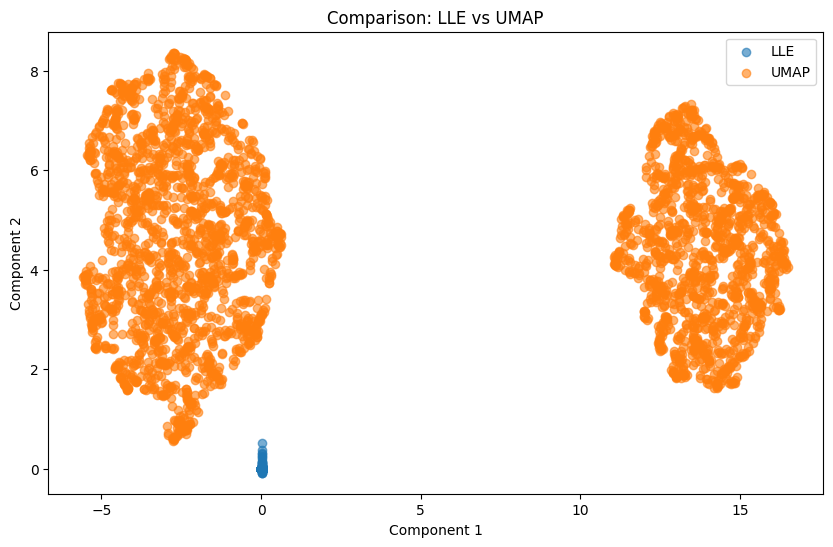

In [22]:
# Plot pairwise comparison of two techniques
plt.figure(figsize=(10, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], alpha=0.6, label="LLE")
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6, label="UMAP")
plt.title("Comparison: LLE vs UMAP")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

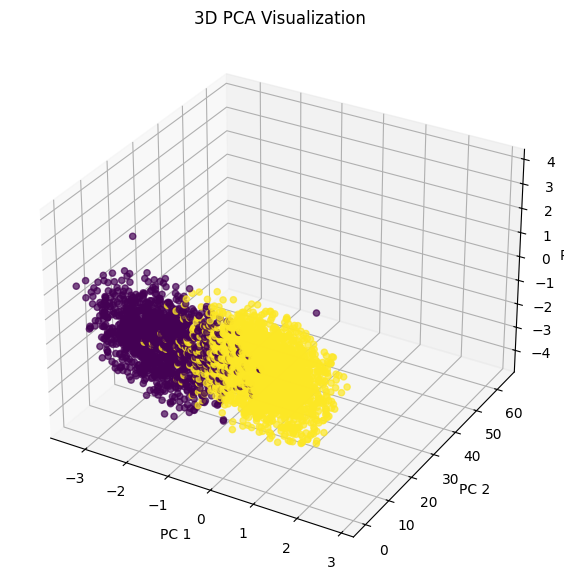

In [23]:
# 3D Plot with PCA for deeper understanding
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3, random_state=0)
X_pca_3d = pca_3d.fit_transform(X_train)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=X_train[:, -1], cmap="viridis", alpha=0.7)
ax.set_title("3D PCA Visualization")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.show()

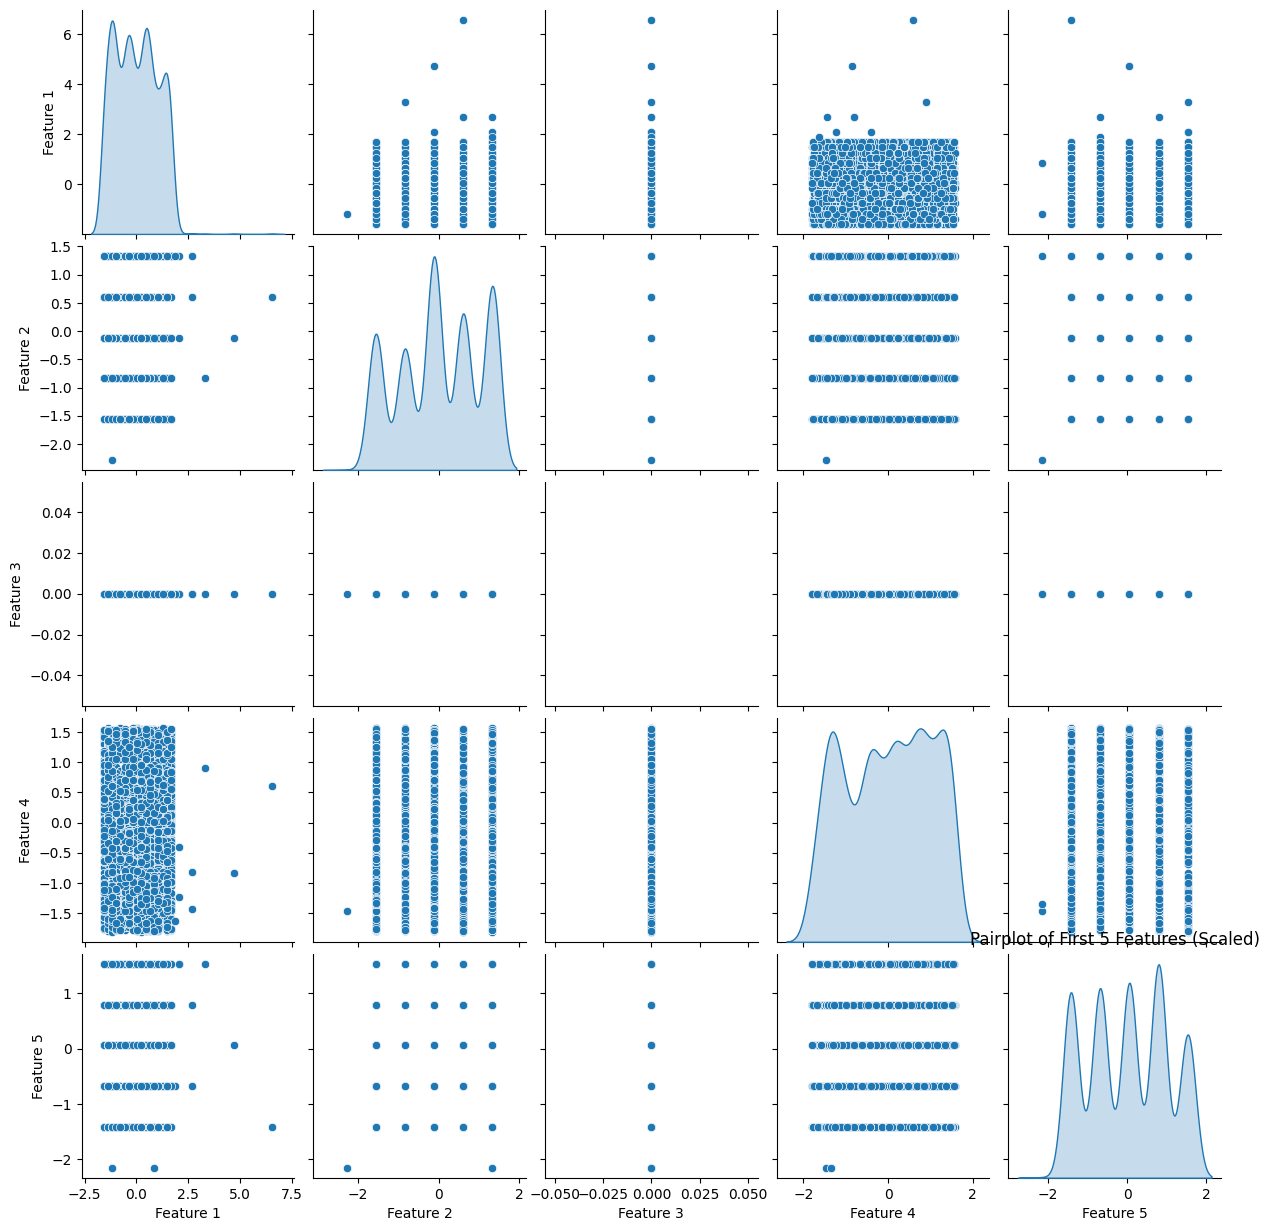

In [25]:
# Pairplot with Plotly

sns.pairplot(pd.DataFrame(X_train[:, :5], columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']),
             diag_kind="kde")
plt.title("Pairplot of First 5 Features (Scaled)")
plt.show()